# DS7331 Project 1 
#### Group 2: Hollie Gardner, Cleveland Johnson, Shelby Provost
Dataset from https://archive-beta.ics.uci.edu/ml/datasets/census+income

In [28]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

## Lab One - Visualization and Data Preprocessing 
### Part One: Business Understanding 
* **1. Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?).**<br>
    <br>Census data is regularly collected by the US Census Bureau in order for the government to understand the characteristics of US population. Data collected from every household in the US through census surveys typically includes details on a number of items such as number of people in the household, income, profession, race/ethnity, languages spoken, sex, age, etc. This dataset was extract from the 1994 Census database by Barry Becker for the purpose of predicting if an individual's income is greater than $50k.<br>
    <br>

* **2. Describe how you would define and measure the outcomes from the dataset.**<br>
    <br>The outcomes from this dataset 
    
* **3. Why is this data important and how do you know if you have mined useful knowledge from the dataset?**<br>
    <br>This data is important because it helps the government understand the health of the economy and the ability of its citizens to participate fully. The data can assist government offices in identifying priorities for initiatives or policies to push forward. Furthermore, the data can provide some insight into any inequities that exist within sex, age, or race categories or comparing similar jobs across private and government sectors. Useful knowledge mined from the dataset would be able to confidently explain possible relationships from correlations between the attributes to provide insights to provide the "what" is happening, so action can be taken to figure out "why" it is happening. <br>
    <br>
* **4. How would you measure the effectiveness of a good prediction algorithm?**<br>
    <br>The effectiveness of a good prediction algorithm would be measured through the error rates in the algorithm's ability to classify learn from the training data and predict the individual income categories in the test set based off of the attributes provided.

### Part Two: EDA 
**1. Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.**



This dataset contains 15 attributes for 32,560 instances in the training set. The test set includes an additional 16,281 instances. In addition to the code below, details were obtained from the adult.names file provided by dataset donors from the above linked UCI website.

The attribute descriptions are as follows:
* **age** (integer, range 17-90 ): This is the age of the individual. 
* **workclass** (categorical, 9 levels): Work class is the sector or category of the individual's occupation
* **fnlwgt** (integer, range 13769-1484705): The "final weight" attribute was calculated from the Current Population Survey and "refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population." (See full description of this attribute from Kohavi and Becker below)
* **education** (categorical, 16 levels): Highest level of education the individual has obtained
* **education-num** (integer, range 1-16): ___
* **marital-status** (categorical, 7 levels): The individual's marital status
* **occupation** (categorical, 15 levels): The type of work an individual performs
* **relationship** (categorical, 6 levels): ____
* **race** (categorical, 5 levels): Individual's racial group
* **sex** (categorical, 2 levels): Male or Female
* **capital-gain** (integer, range 0-99999): _____
* **capital-loss** (integer, range 0-4356): _____
* **hours-per-week** (integer, range 1-99): Number of hours per week individual works in occupation
* **native-country** (categorical, 42 levels): The individual's native country
* **income** (categorical, 2 levels): This has been converted from the raw data to be less than or equal to $50K or greater than $50K
<br>
<br>

**Kohavi and Becker Description of Final Weight from adult.names file:**
<br>
"The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
1.  A single cell estimate of the population 16+ for each state.
2.  Controls for Hispanic Origin by age and sex.
3.  Controls by Race, age and sex.
<br>

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used.
<br>
The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population.
<br><br>
People with similar demographic characteristics should have similar weights.  There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state."

In [2]:
# Importing the census dataset using pandas
# Reading the CSV file after converting file to csv and removing superfluous spaces via Excel.
df = pd.read_csv('adult-data.csv')

# Getting a first look at the dataset
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
#summary of the dataset
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [4]:
#obtaining number of levels for each object attribute
print(df.nunique())

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
income                2
dtype: int64


**2. Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems?**<br>
<br>
    According to the Kohavi and Becker, the following changes have already been made to the raw data:
* Discretized agrossincome into two ranges with threshold 50,000.
* Convert U.S. to US to avoid periods.
* Convert Unknown to "?"
* Run MLC++ GenCVFiles to generate data,test.
<br>

Therefore, we will begin by looking for the '?' values in the dataset by counting the number in each column. Then, we will replace as null using numpy. We decided to handle missing values in the following three variables which possessed missing values as below: 

* Workclass: 1836 rows
* Occupation: 1843 rows
* Native-Country: 583 rows

There is not a way to impute values for these categorical variables and leaving as unknown variables does not add value to our analysis. Therefore, these rows will be removed leaving us with 30,162 complete rows in this dataframe.

As for duplicates, Kohavi and Becker described 6 duplicate rows. After reviewing our current dataframe, there do not appear to be any instances of duplicate data.


In [5]:
#viewing number of missing values that had 
df.isin(['?']).sum(axis=0)

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [6]:
#converting '?' values to nan and then removing the row (code from asynch 1 notebook)
df = df.replace(to_replace='?',value=np.nan) # replace -1 with NaN (not a number)
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [7]:
#Kohavi and Becker describe 6 instances of duplicates. i can't seem to find them. 
df.duplicated(subset=None, keep='first')
df.info()
#no changes in values. the duplicates have likely been removed prior.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


**3. Give simple, appropriate statistics (range, mode, mean, median, variance, counts, etc.) for the most important attributes and describe what they mean or if you found something interesting. Note: You can also use data from other sources for comparison. Explain the significance of the statistics run and why they are meaningful.**

In [8]:
#convert income to 0 and 1 to enable easier analysis (code from https://towardsdatascience.com/a-beginners-guide-to-data-analysis-machine-learning-with-python-adult-salary-dataset-e5fc028b6f0a)
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1}).astype(int)


0.2408095574460244


In [16]:
print('Percentage of Individuals with Income Greater than $50K')
print (df.income.sum() / df.income.count())#percentage

Percentage of Individuals with Income Greater than $50K
0.2408095574460244


In [18]:
print('General Statistics for Numeric Values')
df.describe()

General Statistics for Numeric Values


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [30]:
#creating dataframes for percentage of each level in the categorical attribute
race_per = df['race'].value_counts()/len(df)*100
sex_per = df['sex'].value_counts()/len(df)*100
marital_per = df['marital-status'].value_counts()/len(df)*100
country_per = df['native-country'].value_counts()/len(df)*100
education_per = df['education'].value_counts()/len(df)*100
workclass_per = df['workclass'].value_counts()/len(df)*100
occupation_per = df['occupation'].value_counts()/len(df)*100
relation_per = df['relationship'].value_counts()/len(df)*100

Percentage of Each Sex Level
Male      66.920549
Female    33.079451
Name: sex, dtype: float64


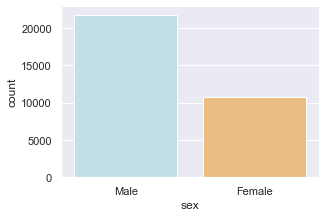

In [90]:
ax = sns.catplot(x="sex", data=df, kind="count", height=3, aspect=1.5, palette='RdYlBu_r')
print('Percentage of Each Sex Level')
print(sex_per)


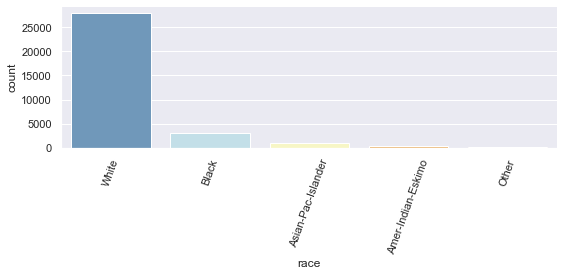

Percentage of Each Race Categorical Level
White                 85.427352
Black                  9.594300
Asian-Pac-Islander     3.190934
Amer-Indian-Eskimo     0.955130
Other                  0.832284
Name: race, dtype: float64


In [103]:
ax = sns.catplot(x="race", data=df, kind="count", height=4, aspect=2, palette='RdYlBu_r')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()
print('Percentage of Each Race Categorical Level')
print(race_per)


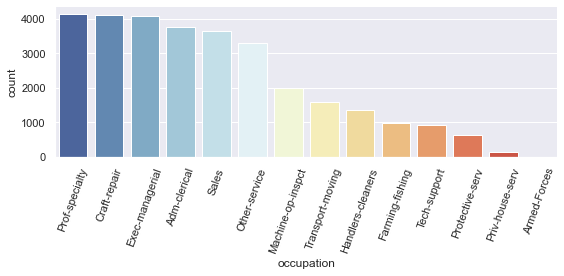

Percentage of Each OccupationLevel
Prof-specialty       12.714597
Craft-repair         12.588680
Exec-managerial      12.487331
Adm-clerical         11.578268
Sales                11.209729
Other-service        10.119468
Machine-op-inspct     6.148460
Transport-moving      4.904641
Handlers-cleaners     4.207487
Farming-fishing       3.052732
Tech-support          2.850035
Protective-serv       1.993182
Priv-house-serv       0.457603
Armed-Forces          0.027640
Name: occupation, dtype: float64


In [102]:
ax = sns.catplot(x="occupation", data=df, kind="count", height=4, aspect=2, palette='RdYlBu_r', 
    order=df['occupation'].value_counts().index)
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()
print('Percentage of Each OccupationLevel')
print(occupation_per)


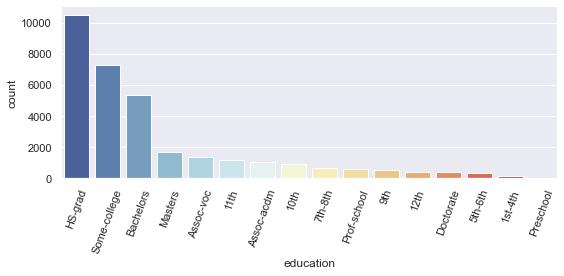

Percentage of Each Education Categorical Level
White                 85.427352
Black                  9.594300
Asian-Pac-Islander     3.190934
Amer-Indian-Eskimo     0.955130
Other                  0.832284
Name: race, dtype: float64


In [105]:
ax = sns.catplot(x="education", data=df, kind="count", height=4, aspect=2, palette='RdYlBu_r', 
    order=df['education'].value_counts().index)
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()
print('Percentage of Each Education Categorical Level')
print(race_per)

In [108]:
#Aggregating by race and income over 50K code adapted from asynch 2 notebook
df_grouped = df.groupby(by='race')
print (df_grouped.income.sum() / df_grouped.income.count())#percentage
df_grouped = df.groupby(by='sex')
print (df_grouped.income.sum() / df_grouped.income.count())#percentage
df_grouped = df.groupby(by='marital-status')
print (df_grouped.income.sum() / df_grouped.income.count())#percentage
df_grouped = df.groupby(by='native-country')
print (df_grouped.income.sum() / df_grouped.income.count())#percentage

race
Amer-Indian-Eskimo    0.115756
Asian-Pac-Islander    0.265640
Black                 0.123880
Other                 0.092251
White                 0.255860
Name: income, dtype: float64
sex
Female    0.109461
Male      0.305737
Name: income, dtype: float64
marital-status
Divorced                 0.104209
Married-AF-spouse        0.434783
Married-civ-spouse       0.446848
Married-spouse-absent    0.081340
Never-married            0.045961
Separated                0.064390
Widowed                  0.085599
Name: income, dtype: float64
native-country
Cambodia                      0.368421
Canada                        0.322314
China                         0.266667
Columbia                      0.033898
Cuba                          0.263158
Dominican-Republic            0.028571
Ecuador                       0.142857
El-Salvador                   0.084906
England                       0.333333
France                        0.413793
Germany                       0.321168
Greece        

In [13]:
#calculating the percentage of each grouped category by race and sex
df_grouped = df.groupby(by=['race','sex'])
print ("Percentage of individuals with income greater than 50K in each group:")
print (df_grouped.income.sum() / df_grouped.income.count() *100)

Percentage of individuals with income greater than 50K in each group:
race                sex   
Amer-Indian-Eskimo  Female    10.084034
                    Male      12.500000
Asian-Pac-Islander  Female    12.427746
                    Male      33.621934
Black               Female     5.787781
                    Male      18.929254
Other               Female     5.504587
                    Male      11.728395
White               Female    11.895395
                    Male      31.756545
Name: income, dtype: float64


In [122]:
# this python magics will allow plot to be embedded into the notebook - code adapted from asynch 2 nb
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

In [123]:
# the cross tab operator provides an easy way to get these numbers
income50k = pd.crosstab([ df['race'],df['sex'] ], 
                       df.income.astype(bool))
print (income50k)

income                     False  True 
race               sex                 
Amer-Indian-Eskimo Female    107     12
                   Male      168     24
Asian-Pac-Islander Female    303     43
                   Male      460    233
Black              Female   1465     90
                   Male     1272    297
Other              Female    103      6
                   Male      143     19
White              Female   7614   1028
                   Male    13085   6089


Percentage of Individuals by Race and Sex with Income>$50K


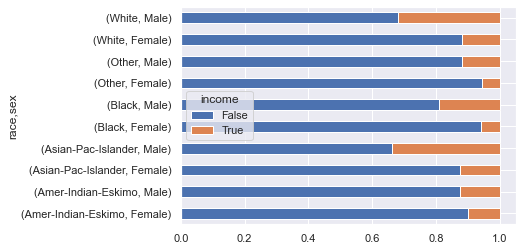

In [124]:
income50k_rate = income50k.div(income50k.sum(1).astype(float),
                             axis=0) # normalize the value

print('Percentage of Individuals by Race and Sex with Income>$50K')
# print survival_rate
ax = income50k_rate.plot(kind='barh', stacked=True)


**Interpretation of Crosstab for Race and Sex**
* White men and Asian Pacific Islander men have similar percentages of their respectives groups which are the highest among all groups. 
* Women in each race category have a smaller percentage of earners over $50k than men in the same race.
* The largest disparity across all groups exists for Black women and women who fall in the "Other" category.


**4. Visualize the most important attributes appropriately (at least 5 attributes). Important: Provide an interpretation for each chart. Explain for each attribute why the chosen visualization is appropriate.**

**5. Explore relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.** 

**6. Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).**

**7. Are there other features that could be added to the data or created from existing features? Which ones?**

ideas from hg: 
* add another column for immigrant and populate with 0 if native-country=="United-States" and 1 if native-country is another country.

In [126]:
df['immigrant'] = np.where(df['native-country']!= 'United-States', 1, 0)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,immigrant
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,1


In [131]:
# the cross tab operator of immigrant status and income
income50k = pd.crosstab([ df['immigrant']], 
                       df.income.astype(bool))
print (income50k)

income     False  True 
immigrant              
0          21999   7171
1           2721    670


Percentage of Individuals by Immigrant Status(1) with Income>$50K


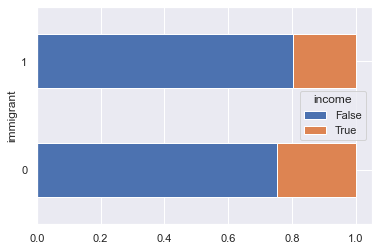

In [132]:
income50k_rate = income50k.div(income50k.sum(1).astype(float),
                             axis=0) # normalize the value

print('Percentage of Individuals by Immigrant Status(1) with Income>$50K')
# print income50k_rate
ax = income50k_rate.plot(kind='barh', stacked=True)

**Interpretation of crosstab of immigrant status**
The percentage of immigrants who have an income greater than $50k is less than the percentage of non-immigrants who have an income greater than $50k. While this could be affected by a number of other factors, there may be some indication that there are barriers that prevent immigrants from participating fully or receiving the same income for the same work as non-immigrants.

**8. Exceptional Work, One idea: implement dimensionality reduction, then visualize and interpret the results.**